In [36]:
import numpy as np
import itertools
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
# !pip install librosa

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [40]:
# !pip install librosa
import librosa
audio_path = '/content/drive/MyDrive/원천데이터/sample/7.응급의료_420186_label.wav'
y, sr = librosa.load(audio_path)

In [49]:
def get_target_data(data_dir):
    audio_path_list = []
    audio_path_list.extend(glob(os.path.join(data_dir,'*.wav')))
    label_list = [1] * len(audio_path_list)
           
    return audio_path_list, label_list

In [50]:
import os
from glob import glob
all_audio_path, all_label = get_target_data('/content/drive/MyDrive/원천데이터/sample')

In [51]:
len(all_audio_path)

1073

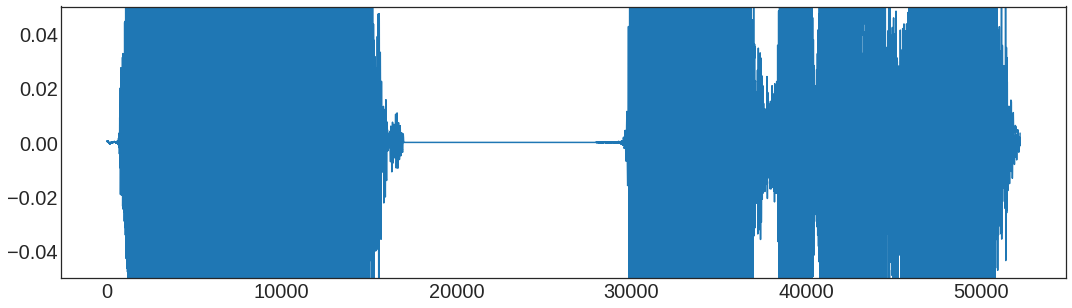

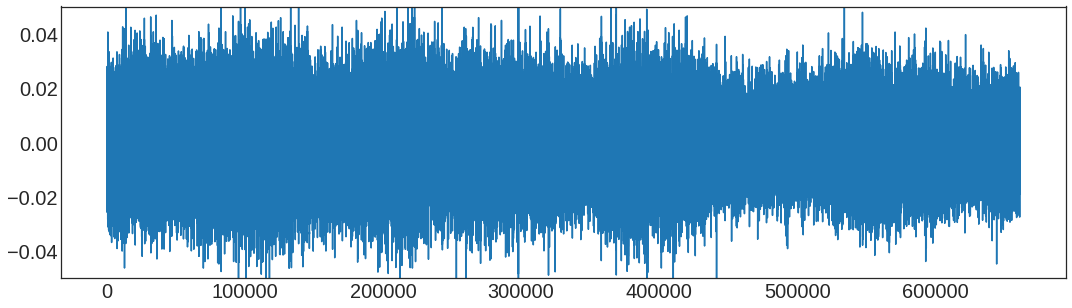

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=512 is too small for input signal of length=431
  n_fft, y.shape[-1]


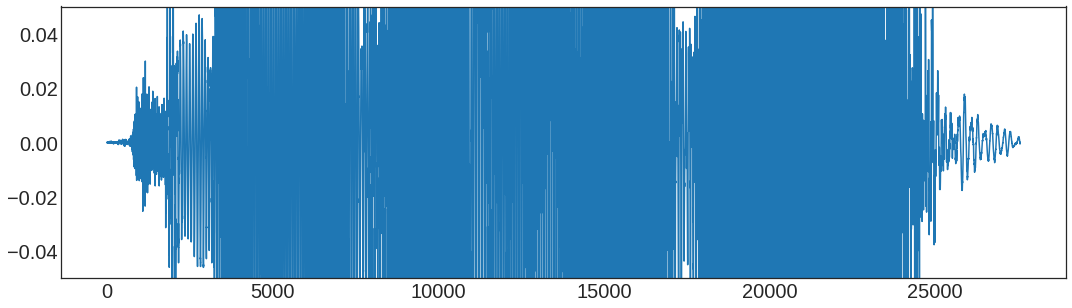

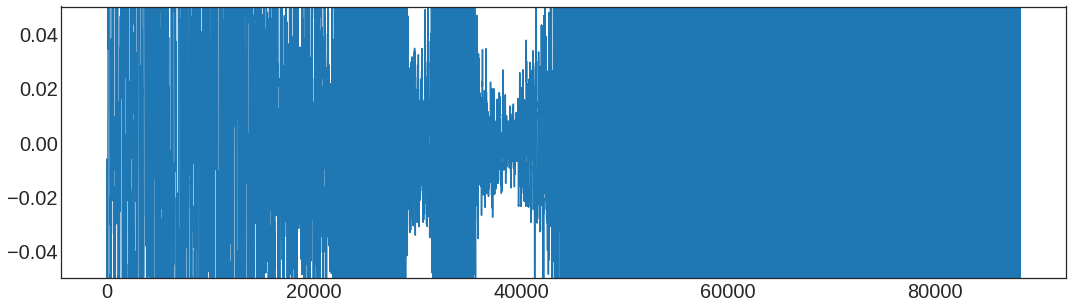

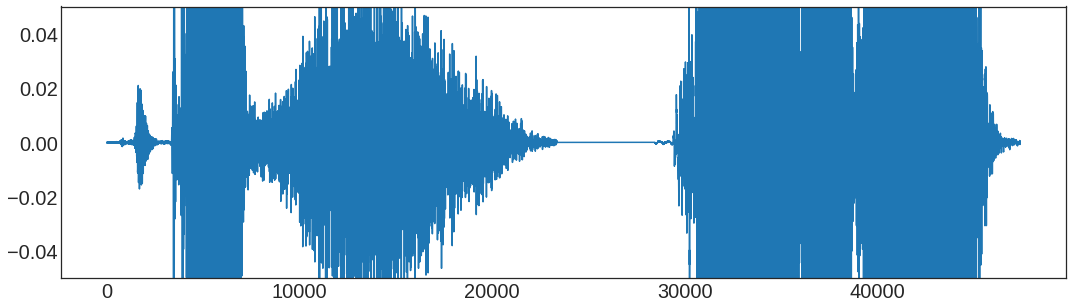

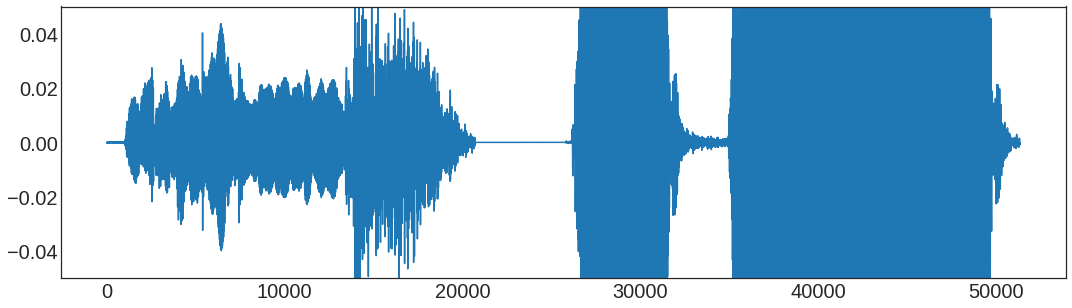

In [59]:
import librosa.display
import librosa

idx = 0
for path in all_audio_path:
  if idx==6:
    break
  import librosa.display
  y, sr = librosa.load(path)
  ret = librosa.cqt(y, sr, hop_length=1024, n_bins=24*7, bins_per_octave=24)
  ret = np.abs(ret)
  audio_np = np.array(y, np.float32)
  
  # y, sr = librosa.load(path)
  # ret = librosa.cqt(y, sr, hop_length=1024, n_bins=24*7, bins_per_octave=24)
  # amp_db = librosa.amplitude_to_db(np.abs(ret),ref=np.max)
  # librosa.display.specshow(amp_db, sr=sr, x_axis='time', y_axis='cqt_note')
  # plt.colorbar(format='%+2.0f dB')
  # plt.tight_layout()  
  # plt.show()
  # idx += 1
  plt.rc('font', size=20)  
  plt.figure(figsize=(18, 5))
  plt.plot(audio_np)
  plt.ylim((-0.05, 0.05))
  plt.show()
  idx += 1

In [23]:
idx = 0
df = []
for path in all_audio_path:
    if idx == 5:
      continue
    y, sr = librosa.load(path)
    n_fft = int(np.ceil(0.025*sr))
    win_length = int(np.ceil(0.025*sr))
    hop_length = int(np.ceil(0.01*sr))
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=60, win_length=win_length, hop_length=hop_length, n_fft=n_fft)

#     S_dB = librosa.power_to_db(S, ref=np.max)
    df.append(S)
#     df_log.append(S_dB)
    # target.append(1)
    idx += 1

In [24]:
df

[]

In [ ]:
import librosa.display
ret = librosa.cqt(y, sr, hop_length=1024, n_bins=24*7, bins_per_octave=24)
ret = np.abs(ret)

In [5]:
audio_np = np.array(y, np.float32)

In [6]:
audio_np.shape

(70781,)

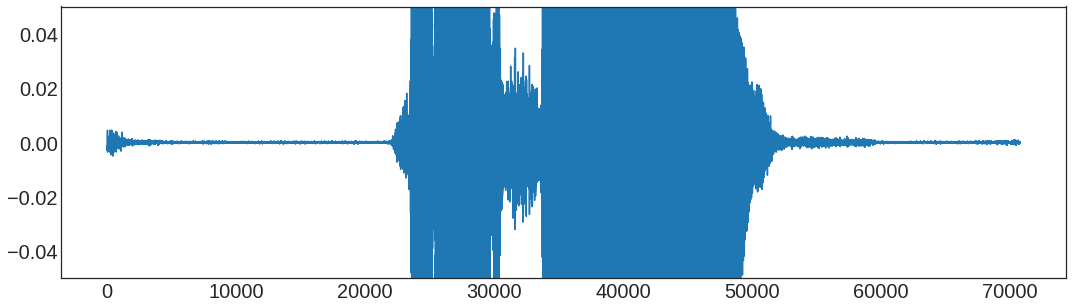

In [7]:
import matplotlib.pyplot as plt

plt.rc('font', size=20)  
plt.figure(figsize=(18, 5))
plt.plot(audio_np)
plt.ylim((-0.05, 0.05))
plt.show()

In [8]:
import IPython.display as ipd

ipd.Audio(y, rate=sr)

- wav는 매 순간의 음압을 측정하여 그 수치를 저장한 형태이기 때문에 그 자체로 음악을 분석하기에 적합하지 않음 (음의 높이와 세기를 듣는것이지 순간의 음압을 듣는게 아니기 때문)
- 푸리에 변환과 같은 변환 기법을 이용하여 시간 축의 데이터를 주파수 축의 데이터로 바꿔줘야할 필요가 있음
- 푸리에 변환 대신 푸리에 변환과 유사한 Constant-Q 변환을 사용
- Constant-Q 변환은 주파수 축이 로그 단위로 변환되고, 각 주파수에 따라 해상도가 다양하게 처리되기 때문에(저주파는 저해상도, 고주파는 고해상도) 음악을 처리하는 데에 푸리에 변환보다 유리
- 주파수 대역을 저장할 리스트 audio_cqt 선언
- constant-Q 변환할 때는 변환할 오디오 데이터와 sampling rate가 필요
- 해당 데이터에서는 sampling rate가 모두 동일하므로 따로 처리가 필요하지 않음
- 여기서는 Constant-Q 변환을 사용해 오디오 데이터를 주파수 대역으로 변환
- 변환에는 앞서 준비한 데이터를 가져와 사용하며, Constant-Q 변환에는 librosa.cqt 함수를 사용
- 여기서 n_bins는 옥타브 단계 및 개수를, bins_per_octave는 한 옥타브가 가지는 단계를 의미
- 라벨에 대해선 원 핫 인코딩을 적용

In [9]:
import librosa.display
ret = librosa.cqt(y, sr, hop_length=1024, n_bins=24*7, bins_per_octave=24)
ret = np.abs(ret)


/usr/local/lib/python3.7/dist-packages/librosa/display.py:1336: UserWarning: Frequency axis exceeds Nyquist. Did you remember to set all spectrogram parameters in specshow?
  "Frequency axis exceeds Nyquist. "


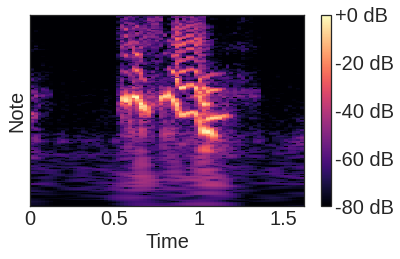

In [10]:
amp_db = librosa.amplitude_to_db(np.abs(ret),ref=np.max)
librosa.display.specshow(amp_db, sr=sr, x_axis='time', y_axis='cqt_note')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

In [11]:
amp_db

array([[-80.      , -80.      , -80.      , ..., -75.83446 , -75.3098  ,
        -75.12728 ],
       [-76.63472 , -76.7277  , -76.99052 , ..., -75.2478  , -74.64441 ,
        -74.43328 ],
       [-73.86203 , -74.04776 , -74.5996  , ..., -78.24156 , -78.51001 ,
        -78.645424],
       ...,
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ],
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ],
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ]], dtype=float32)

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

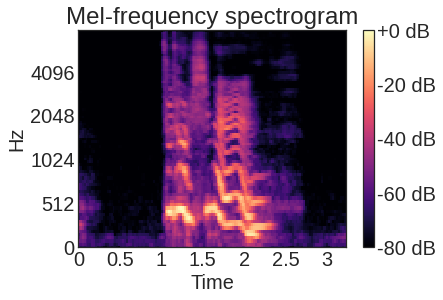

In [12]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=80)
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel',sr=sr, fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

In [ ]:
S_dB.shape

(80, 139)

In [ ]:
s = np.array(S_dB, np.float32)
s.shape

(80, 139)

In [44]:
def get_target_data(data_dir):
    audio_path_list = []
    audio_path_list.extend(glob(os.path.join(data_dir,'*.wav')))
    label_list = [1] * len(audio_path_list)
           
    return audio_path_list, label_list

In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [47]:
import os
from glob import glob
all_audio_path, all_label = get_target_data('/content/drive/MyDrive/원천데이터/sample')

In [48]:
len(all_audio_path), len(all_label)

(1073, 1073)

In [ ]:
all_audio_path

['./data/위급상황/원천데이터/sample\\1.강제추행(성범죄)_105095_label.wav',
 './data/위급상황/원천데이터/sample\\1.강제추행(성범죄)_109734_label.wav',
 './data/위급상황/원천데이터/sample\\1.강제추행(성범죄)_112116_label.wav',
 './data/위급상황/원천데이터/sample\\1.강제추행(성범죄)_121567_label.wav',
 './data/위급상황/원천데이터/sample\\1.강제추행(성범죄)_128474_label.wav',
 './data/위급상황/원천데이터/sample\\1.강제추행(성범죄)_132358_label.wav',
 './data/위급상황/원천데이터/sample\\1.강제추행(성범죄)_133045_label.wav',
 './data/위급상황/원천데이터/sample\\1.강제추행(성범죄)_133763_label.wav',
 './data/위급상황/원천데이터/sample\\1.강제추행(성범죄)_134587_label.wav',
 './data/위급상황/원천데이터/sample\\1.강제추행(성범죄)_136487_label.wav',
 './data/위급상황/원천데이터/sample\\1.강제추행(성범죄)_137508_label.wav',
 './data/위급상황/원천데이터/sample\\1.강제추행(성범죄)_137863_label.wav',
 './data/위급상황/원천데이터/sample\\1.강제추행(성범죄)_138969_label.wav',
 './data/위급상황/원천데이터/sample\\1.강제추행(성범죄)_140332_label.wav',
 './data/위급상황/원천데이터/sample\\1.강제추행(성범죄)_140886_label.wav',
 './data/위급상황/원천데이터/sample\\1.강제추행(성범죄)_141332_label.wav',
 './data/위급상황/원천데이터/sample\\1.강제추행(성범죄)_142190_label.wav

In [ ]:
def get_normal_data(data_dir):
    normal_path_list = []
    
    for case_name in os.listdir(data_dir):
        current_path = os.path.join(data_dir, case_name)
        for case_name_2 in os.listdir(current_path):
            current_path_2 = os.path.join(current_path, case_name_2)
            for case_name_3 in os.listdir(current_path_2):
                current_path_3 = os.path.join(current_path_2, case_name_3)
                normal_path_list.extend(glob(os.path.join(current_path_3,'*.wav')))
    
    label_list = [0] * len(normal_path_list)
           
    return normal_path_list, label_list

In [ ]:
all_normal_path, all_normal_label = get_normal_data('./원천데이터/KrespSpeech')

In [ ]:
len(all_normal_path), len(all_normal_label)

(5463, 5463)

## 경로를 이용해서 모든 데이터 가져온 후 음성데이터에서 

주요 개념

1. 푸리에 변환

음성 신호에 푸리에 변환을 적용하면 각 진동수 성분이 그 음성에 얼마나 들어있는지 알 수 있습니다.

쉽게 설명하면 음성 신호에 저음이 얼마나 있고, 고음이 얼마나 있는지를 정량적으로 구할 수 있습니다.

2. STFT(Short Time Fourier Transform)

음성을 작게(0.01초 수준) 잘라서 각 작은 조각에 푸리에 변환을 적용할 수 있습니다.
이것을 STFT라고 부르고 일반적으로 이 결과의 L2 norm을 Spectrogram이라고 부릅니다.

3. Melspectrogram

Melspectrogram은 Spectrogram에 mel-filter라는 필터를 적용해서 얻어집니다. 이는 사람의 청각 기관이 저음에서 주파
수 변화에 민감하고 고음에서는 주파수의 변화에 덜 민감한 특징을 반영하고 있습니다.

- Function and Option

torchaudio에서는 다음과 같이 Spectrogram과 Melspectrogram을 얻을 수 있는 프로세스를 정의할 수 있습니다.
AmplitudeToDB는 power단위의 Spectrogram 또는 Melspectrogram을 dB(로그) 단위로 변환해 줍니다.

1. win_length

음성을 작은 조각으로 자를 때 작은 조각의 크기를 의미합니다.
자연어 처리 분야에서는 25ms의 크기를 기본으로 하고 있으며 16000Hz인 음성에서는 400에 해당하는 값입니다. (16000/40)
22050Hz의 파일이기 때문에 552로 설정하겠습니다. (22050/40, 소수점 올림)

2. n_fft

win_length의 크기로 잘린 음성의 작은 조각은 0으로 Padding 되어서 n_fft로 크기가 맞춰집니다. 그렇게 padding 된 조각
에 푸리에 변환이 적용됩니다. 따라서 n_fft는 win_length보다 크거나 같아야 하고 일반적으로 속도를 위해서 값으로 설정
합니다.
win_length의 크기가 552이기 때문에 512는 될 수 없고, 1024는 너무 크다고 생각하여 win_length와 똑같이 552로 설정하
겠습니다.

3. hop_length

음성을 작은 조각으로 자를 때, 자르는 간격을 의미합니다. 즉, 이 길이만큼 옆으로 밀면서 작은 조각을 얻습니다.
일반 적으로 10ms의 크기를 기본으로 하고 있으며 16000Hz인 음성에서는 160에 해당하는 값입니다. (16000/100)
22050Hz의 파일이기 때문에 221로 설정하겠습니다. (22050/100)

4. n_mels

적용할 mel filter의 개수를 의미합니다

n_mel이 80이면 Melspectrogram의 주파수 방향 성분 수는 80인 것입니다.


마지막으로 Spectrogram과 Melspectrogram의 해상력에 대해 설명하겠습니다.

win_length가 커질수록 주파수 성분에 대한 해상력은 높아지지만(정밀해진다) 시간 성분에 대한 해상력은 낮아지게 됩니다.

즉, 더 정밀한 주파수 분포를 얻을 수 있으나 시간에 따른 주파수 변화를 관찰하기가 어려워집니다.

반대로 win_length가 작은 경우에는 주파수 성분에 대한 해상력은 낮아지지만, 시간 성분에 대한 해상력은 높아지게 됩니다.

따라서 적절한 값을 찾는 것이 중요합니다.

또한 n_fft를 키우는 경우 주파수 성분의 수는 증가할지 몰라도 실제 주파수의 해상력은 증가하지 않습니다

'마지막으로 spectrogram과 melspectrogram의 해상력에 대해 설명하겠습니다. win_length가 커질수록 주파수 성분에 대한 해상력은 높아지지만, 즉 더 정밀해지지만, 시간 성분에 대한 해상력은 낮아지게 됩니다. 즉, 더 정밀한 주파수 분포를 얻을 수 있으나 시간에 따른 주파수 변화를 관찰하기가 어려워집니다. 반대로 win_length가 작은 경우에는 주파수 성분에 대한 해상력은 낮아지지만, 시간 성분에 대한 해상력은 높아지게 됩니다. 따라서 적절한 값을 찾는 것이 중요합니다.'

In [ ]:
import pandas as pd

df = []
df_log = []
target = []

    # n_mels를 128로 해볼까?
    
    
    # https://hyongdoc.tistory.com/402
    
#     https://ahnjg.tistory.com/93

# https://jamm-notnull.tistory.com/18

In [ ]:
for path in all_audio_path:
    y, sr = librosa.load(path)
    n_fft = int(np.ceil(0.025*sr))
    win_length = int(np.ceil(0.025*sr))
    hop_length = int(np.ceil(0.01*sr))
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=60, win_length=win_length, hop_length=hop_length, n_fft=n_fft)

#     S_dB = librosa.power_to_db(S, ref=np.max)
    df.append(S)
#     df_log.append(S_dB)
    target.append(1)

In [ ]:
# https://dacon.io/competitions/official/235616/codeshare/1575?page=1&dtype=recent&ptype=pub

# https://arxiv.org/abs/1905.13214

# https://bskyvision.com/644

# ResNet을 공부해서 CNN과 관련한 완벽한 모델 만들기

In [ ]:
for path in all_normal_path:
    y, sr = librosa.load(path)
    n_fft = int(np.ceil(0.025*sr))
    win_length = int(np.ceil(0.025*sr))
    hop_length = int(np.ceil(0.01*sr))
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=60, win_length=win_length, hop_length=hop_length, n_fft=n_fft)

#     S_dB = librosa.power_to_db(S, ref=np.max)
    df.append(S)
#     df_log.append(S_dB)
    target.append(0)

In [ ]:
arr_df = []
arr_target = []
import itertools

for i in range(len(df)):
    if df[i].shape[0] * df[i].shape[1] < 20000:
        arr_df.append( list(itertools.chain(*df[i]))) 
        arr_target.append(target[i])

In [ ]:
max_len = max(len(item) for item in arr_df)
print('최대 길이 :',max_len)

최대 길이 : 19980


In [ ]:
for sentence in arr_df:
    avg = sum(sentence)/len(sentence)
    while len(sentence) < max_len:
        sentence.append(avg)

padded_np = np.array(arr_df)
padded_np

array([[6.64348772e-05, 2.46540149e-05, 6.68625489e-06, ...,
        4.22525623e-01, 4.22525623e-01, 4.22525623e-01],
       [5.50257425e-07, 1.48664071e-06, 5.59959335e-06, ...,
        4.55912275e-01, 4.55912275e-01, 4.55912275e-01],
       [3.82373514e-07, 1.98643292e-07, 4.13737155e-07, ...,
        6.79532596e-02, 6.79532596e-02, 6.79532596e-02],
       ...,
       [3.84348695e-08, 3.76364140e-09, 3.38701800e-09, ...,
        1.34229412e-04, 1.34229412e-04, 1.34229412e-04],
       [3.08966470e-08, 7.25314075e-09, 1.25346009e-08, ...,
        2.00912962e-04, 2.00912962e-04, 2.00912962e-04],
       [2.90366495e-03, 4.00942343e-04, 2.62961636e-04, ...,
        4.56986022e-01, 4.56986022e-01, 4.56986022e-01]])

In [ ]:
padded_np.shape

(3472, 19980)

In [ ]:
target_np = np.array(arr_target)
target_np.shape

(3472,)

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# scaler.fit(padded_np)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    padded_np,
    target_np,
    test_size=0.2,
    random_state=0
)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
pred = DT.predict(X_test)
acc = accuracy_score(pred, y_test)
print(acc)


## 머신러닝 모델 중에서 성능이 가장 뛰어났던 DecisionTreeClassifier를 저장

In [ ]:
# import joblib
# joblib.dump(model, 'DecisionTree_model.pkl') 

NameError: name 'model' is not defined

# CNN 으로 돌리기 ( 80, 249 )

In [ ]:
padded_np.shape

(3472, 19980)

In [ ]:
b = padded_np.reshape(3472, 60, 333)
b.shape

(3472, 60, 333)

In [ ]:
re_np = np.expand_dims(b, -1)
re_np.shape

(3472, 60, 333, 1)

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# scaler.fit(re_np)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    re_np,
    target_np,
    test_size=0.2,
    random_state=0
)

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [ ]:
from keras.layers import Conv2D, MaxPool2D, Flatten, Dropout

def model_CNN_build():
    model = Sequential()
    input = Input(shape=(60,333,1))
    
    output = Conv2D(64, 3, strides=1, padding='same', activation='relu')(input)
    output = MaxPool2D(pool_size=(2,2), strides=2, padding='same')(output)

    output = Conv2D(128, 3, strides=1, padding='same', activation='relu')(input)
    output = MaxPool2D(pool_size=(2,2), strides=2, padding='same')(output)
    # output = Dropout(0.25)(output)

    output = Conv2D(256, 3, strides=1, padding='same', activation='relu')(output)
    output = MaxPool2D(pool_size=(2,2), strides=2, padding='same')(output)
    # output = Dropout(0.25)(output)

    output = Conv2D(512, 3, strides=1, padding='same', activation='relu')(output)
    output = MaxPool2D(pool_size=(2,2), strides=2, padding='same')(output)
    # output = Dropout(0.25)(output)

    output=Flatten()(output)
    # output = Dropout(0.5)(output)
    output=Dense(512, activation='relu')(output)
    output=Dense(256, activation='relu')(output)
    output=Dense(128, activation='relu')(output)
    output=Dense(64, activation='relu')(output)
    output=Dense(1, activation='sigmoid')(output)
    
    model = Model(inputs=[input], outputs=output)
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

    return model



In [ ]:
model = model_CNN_build()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 60, 333, 1)]      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 333, 128)      1280      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 167, 128)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 167, 256)      295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 84, 256)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 15, 84, 512)       118016

In [ ]:
es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('CNN_new_model2.h5', monitor='acc', mode='max', verbose=1, save_best_only=True)


hist = model.fit(X_train, y_train, epochs=20, verbose=0, callbacks=[es,mc], batch_size=128, validation_split=0.2)


Epoch 1: acc improved from -inf to 0.72985, saving model to CNN_new_model2.h5

Epoch 2: acc improved from 0.72985 to 0.88429, saving model to CNN_new_model2.h5

Epoch 3: acc improved from 0.88429 to 0.92976, saving model to CNN_new_model2.h5

Epoch 4: acc improved from 0.92976 to 0.93516, saving model to CNN_new_model2.h5

Epoch 5: acc improved from 0.93516 to 0.94957, saving model to CNN_new_model2.h5

Epoch 6: acc improved from 0.94957 to 0.95407, saving model to CNN_new_model2.h5

Epoch 7: acc improved from 0.95407 to 0.96443, saving model to CNN_new_model2.h5

Epoch 8: acc did not improve from 0.96443

Epoch 9: acc improved from 0.96443 to 0.96668, saving model to CNN_new_model2.h5

Epoch 10: acc improved from 0.96668 to 0.97163, saving model to CNN_new_model2.h5

Epoch 11: acc improved from 0.97163 to 0.97344, saving model to CNN_new_model2.h5

Epoch 12: acc improved from 0.97344 to 0.97929, saving model to CNN_new_model2.h5

Epoch 13: acc improved from 0.97929 to 0.98604, saving

In [ ]:
model.evaluate(X_test,y_test)

22/22 [==============================] - 3s 112ms/step - loss: 0.4559 - acc: 0.9237


[0.4559098184108734, 0.9237409830093384]

In [ ]:
pred = model.predict(X_test)

pred = pred.round()
pred = pred.flatten() # 1차원으로 변경

from sklearn.metrics import recall_score, precision_score

recall_score(y_test,pred), precision_score(y_test,pred)

(0.8473282442748091, 0.7708333333333334)

In [ ]:
log_df = []
log_target = []
import itertools

for i in range(len(df)):
    if df_log[i].shape[0] * df_log[i].shape[1] < 20000:
        log_df.append( list(itertools.chain(*df_log[i]))) 
        log_target.append(target[i])


max_len = max(len(item) for item in log_df)
print('최대 길이 :',max_len)



for sentence in log_df:
    while len(sentence) < max_len:
        sentence.append(0)

log_np = np.array(log_df)
log_np





log_target_np = np.array(log_target)
print(padded_np.shape, log_target_np.shape)

최대 길이 : 19920
(4964, 19920) (4964,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    log_np,
    log_target_np,
    test_size=0.2,
    random_state=0
)


In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
pred = DT.predict(X_test)
acc = accuracy_score(pred, y_test)
print(acc)

0.9234642497482377


In [ ]:
from keras.layers import Conv2D, MaxPool2D, Flatten

def model_CNN_build():
    model = Sequential()
    input = Input(shape=(168,87,1))
    
    output = Conv2D(128, 3, strides=1, padding='same', activation='relu')(input)
    output = MaxPool2D(pool_size=(2,2), strides=2, padding='same')(output)
    
    output = Conv2D(256, 3, strides=1, padding='same', activation='relu')(output)
    output = MaxPool2D(pool_size=(2,2), strides=2, padding='same')(output)
    
    output = Conv2D(512, 3, strides=1, padding='same', activation='relu')(output)
    output = MaxPool2D(pool_size=(2,2), strides=2, padding='same')(output)
    
    output=Flatten()(output)
    output=Dense(512, activation='relu')(output)
    output=Dense(256, activation='relu')(output)
    output=Dense(128, activation='relu')(output)
    output=Dense(1, activation='sigmoid')(output)
    
    model = Model(inputs=[input], outputs=output)
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

    return model


In [ ]:

es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('CNN_best_model.h5', monitor='acc', mode='max', verbose=1, save_best_only=True)


In [ ]:

hist = model.fit(X_train, y_train, epochs=50, verbose=1, callbacks=[es,mc], batch_size=128, validation_split=0.2)

model.evaluate(X_test,y_test)

Epoch 1/50
25/25 [==============================] - ETA: 0s - loss: 669.8251 - acc: 0.7207
Epoch 1: acc improved from -inf to 0.72072, saving model to CNN_best_model.h5
25/25 [==============================] - 1s 58ms/step - loss: 669.8251 - acc: 0.7207 - val_loss: 65.0372 - val_acc: 0.8038
Epoch 2/50
25/25 [==============================] - ETA: 0s - loss: 69.8200 - acc: 0.7695
Epoch 2: acc improved from 0.72072 to 0.76952, saving model to CNN_best_model.h5
25/25 [==============================] - 1s 56ms/step - loss: 69.8200 - acc: 0.7695 - val_loss: 19.4296 - val_acc: 0.8352
Epoch 3/50
25/25 [==============================] - ETA: 0s - loss: 15.5253 - acc: 0.8142
Epoch 3: acc improved from 0.76952 to 0.81423, saving model to CNN_best_model.h5
25/25 [==============================] - 1s 55ms/step - loss: 15.5253 - acc: 0.8142 - val_loss: 5.2908 - val_acc: 0.9057
Epoch 4/50
24/25 [===========================>..] - ETA: 0s - loss: 9.7220 - acc: 0.8236
Epoch 4: acc improved from 0.81423

[1.3816547393798828, 0.9365558624267578]

In [ ]:

pred = model.predict(X_test)

pred = pred.round()
pred = pred.flatten() # 1차원으로 변경

from sklearn.metrics import recall_score, precision_score

recall_score(y_test,pred), precision_score(y_test,pred)

(0.8490566037735849, 0.7758620689655172)